# Create Objects

In [5]:
import numpy as np
import pandas as pd
my_first_nparray = np.random.rand(3)
np_first_ndnparray = np.random.rand(3,2)
my_first_series = pd.Series(my_first_nparray)
my_first_df = pd.DataFrame(np_first_ndnparray)
print(type(my_first_nparray))
print(my_first_nparray)
print(my_first_series)
print(my_first_df)

<class 'numpy.ndarray'>
[0.81498352 0.11850436 0.93874487]
0    0.009945
1    0.495808
2    0.728352
dtype: float64
          0         1
0  0.005908  0.664604
1  0.911913  0.921359
2  0.490536  0.168378


In [9]:
## custom panda index
my_first_series = pd.Series(my_first_nparray, index=['First', "Second", "Third"])
print(my_first_series)
print(my_first_series.index)

First     0.814984
Second    0.118504
Third     0.938745
dtype: float64
Index(['First', 'Second', 'Third'], dtype='object')


In [31]:
my_first_df.columns = ["First","Second"]
my_first_df

,First,Second
0,0.005908,0.664604
1,0.911913,0.921359
2,0.490536,0.168378


# read from csv

In [3]:
import os
data_path = os.path.join(os.path.pardir,'data','raw','pandas')
csv_path = os.path.join(data_path,'artwork_data.csv')
cols_to_use = ['id','artist','title','medium','year','acquisitionYear','width','height','units']
df = pd.read_csv(csv_path, nrows=5, index_col='id', usecols=cols_to_use)
df = pd.read_csv(csv_path, index_col='id', usecols=cols_to_use)
df.to_pickle(os.path.join(data_path,'artwork_data_frame.pickle'))

NameError: name 'pd' is not defined

# read from pickle

In [35]:
df = pd.read_pickle(os.path.join(data_path,'artwork_data_frame.pickle'))
df

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,343,467,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,243,335,mm
1040,"Blake, William",Ciampolo the Barrator Tormented by the Devils,Line engraving on paper,1826,1919.0,240,338,mm
1041,"Blake, William",The Baffled Devils Fighting,Line engraving on paper,1826,1919.0,242,334,mm
1042,"Blake, William",The Six-Footed Serpent Attacking Agnolo Brunel...,Line engraving on paper,1826,1919.0,246,340,mm
1043,"Blake, William",The Serpent Attacking Buoso Donati,Line engraving on paper,1826,1919.0,241,335,mm


# Read from json

In [26]:
## Traverse folders to get all JSON files
## Find the way to read them so that Pandas understands
## Try to produce identical DataFrame as for CSV
import json
records = [("Espresso",'5$'),("Flat White","10$")]
pd.DataFrame.from_records(records, columns=["Coffee","Price"])

,Coffee,Price
0,Espresso,5$
1,Flat White,10$


In [29]:
KEYS_TO_USE = ['id','all_artists','title','medium','dateText','acquisitionYear','width','height','units']
def get_record_from_file(file_path, keys_to_use):
    with open(file_path) as artwork_file:
        content = json.load(artwork_file)
        
    record = []
    for field in keys_to_use:
        record.append(content[field])
    return tuple(record)

SAMPLE_JSON = os.path.join(data_path, 'artworks', 'a', '000', 'a00001-1035.json')
sample_record = get_record_from_file(SAMPLE_JSON, KEYS_TO_USE)
sample_record

(1035,
 'Robert Blake',
 'A Figure Bowing before a Seated Old Man with his Arm Outstretched in Benediction. Verso: Indecipherable Sketch',
 'Watercolour, ink, chalk and graphite on paper. Verso: graphite on paper',
 'date not known',
 1922,
 '394',
 '419',
 'mm')

In [38]:
def read_artworks_from_json(keys_to_use):
    JSON_ROOT = os.path.join(data_path, 'artworks')
    artworks = []
    for root, _, files in os.walk(JSON_ROOT):
        for f in files:
            if f.endswith('json'):
                record = get_record_from_file(os.path.join(root, f), keys_to_use)
                artworks.append(record)
            break
    df = pd.DataFrame.from_records(artworks, columns=keys_to_use, index="id")
    return df

In [39]:
df = read_artworks_from_json(KEYS_TO_USE)
df

,all_artists,title,medium,dateText,acquisitionYear,width,height,units
id,,,,,,,,
6620,William Hogarth,A Scene from ‘The Beggar’s Opera’ VI,Oil paint on canvas,1731,1909,572,762,mm
10413,William James Müller,"Study of Pines, Rheinwald",Watercolour on paper,1834,1908,269,410,mm
496,Sir Lawrence Alma-Tadema,A Silent Greeting,Oil paint on wood,1889,1894,305,229,mm
15803,Frederick Walker,The Vagrants,Oil paint on canvas,1868,1886,832,1264,mm
1810,"Sir Edward Coley Burne-Jones, Bt",Head and Hand,Graphite on paper,date not known,1932,225,165,mm
1368,Antoine Bourdelle,Sir James George Frazer,Plaster,1922,1925,692,311,mm
12802,Dante Gabriel Rossetti,The Girlhood of Mary Virgin,Oil paint on canvas,1848–9,1937,832,654,mm
4078,Sir Charles Lock Eastlake,Mrs Charles H. Bellenden Ker,Oil paint on canvas,1835,1893,762,635,mm
6617,William Hogarth,O the Roast Beef of Old England (‘The Gate of ...,Oil paint on canvas,1748,1895,788,945,mm


# Exploring a dataset

In [128]:
import numpy as np
import pandas as pd
% matplotlib inline

In [133]:
weather_df = pd.read_csv(os.path.join(data_path, 'weather.csv'))
# Step1 df.shape, df.info(), df.head(), df.tail(), df.describe()
weather_df.shape

(8784, 5)

In [135]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 5 columns):
MONTH       8784 non-null int64
DAY         8784 non-null int64
TIME        8784 non-null int64
TEMP        8784 non-null float64
PRESSURE    8784 non-null int64
dtypes: float64(1), int64(4)
memory usage: 343.2 KB


In [136]:
weather_df.head()

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [138]:
weather_df.describe()

,MONTH,DAY,TIME,TEMP,PRESSURE
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,6.513661,183.500000,12.500000,10.768613,10159.254781
std,3.451430,105.660719,6.922581,6.420003,102.895130
min,1.000000,1.000000,1.000000,-6.500000,9812.000000
25%,4.000000,92.000000,6.750000,6.100000,10102.000000
50%,7.000000,183.500000,12.500000,10.200000,10169.000000
75%,10.000000,275.000000,18.250000,15.900000,10227.000000
max,12.000000,366.000000,24.000000,31.700000,10453.000000


In [139]:
# Step2: df/series.max()/min()/mean()/median()
#        df.mode(), series.value_counts(), df.std(), df.var()
#        df.skew(), df.kurtosis(), df.quantile()
weather_df.mean()

MONTH           6.513661
DAY           183.500000
TIME           12.500000
TEMP           10.768613
PRESSURE    10159.254781
dtype: float64

In [143]:
weather_df['PRESSURE'].min()

9812

In [146]:
weather_df['TEMP'].mode() # returns a series but with a single value

0    6.4
dtype: float64

/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


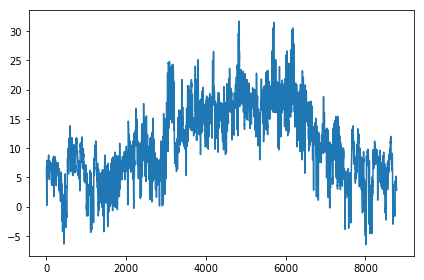

In [147]:
weather_df['TEMP'].plot()

/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


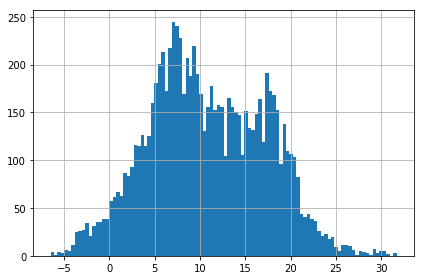

In [148]:
weather_df['TEMP'].hist(bins=100)

# Data Wrangling: remove attributes

In [4]:
raw_path = os.path.join(os.path.pardir,'data','raw')
titanic_csv_path = os.path.join(raw_path,'titanic','train.csv')
titanic_data = pd.read_csv(titanic_csv_path)
titanic_data.head()

NameError: name 'pd' is not defined

In [58]:
titanic_data.drop(titanic_data.columns[[3]],axis=1,inplace=True) # if no inplace=True, drop will not affect original data
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


# Indexing and Filtering

In [59]:
artists = df['artist']
unique_artists = pd.unique(artists) # will return an array object
len(unique_artists)

3336

In [159]:
weather_df['TEMP'].head()[1]

5.8

In [161]:
weather_df.T.head()[2]['TIME']

3.0

In [164]:
t = pd.DataFrame([['John'],['Bob'],['Anne']], index=[4,3,4])
t
t[0][4]

4    John
4    Anne
Name: 0, dtype: object

In [167]:
weather_df['TIME'][[3,1,4]]

3    4
1    2
4    5
Name: TIME, dtype: int64

In [171]:
# slice always selects rows
weather_df[2:4][['TEMP','PRESSURE']]

,TEMP,PRESSURE
2,5.7,10220
3,6.0,10225


In [176]:
capitals = pd.DataFrame(
    [
        ["Ngerulmud", 391, 1.87],
        ["Vatican City", 826, 100],
        ["Yaren", 1100, 10.91],
        ["Funafuti", 4492, 45.48],
        ["City of San Marino", 4493]
    ],
    index = ["Palau", "Vatican City", "Nauru", "Tuvalu", "San Marino"],
    columns = ['Capital', 'Population', 'Percentage']
)
capitals

,Capital,Population,Percentage
Palau,Ngerulmud,391,1.87
Vatican City,Vatican City,826,100.00
Nauru,Yaren,1100,10.91
Tuvalu,Funafuti,4492,45.48
San Marino,City of San Marino,4493,NaN


In [173]:
# same as chain indexing: capitals['Population']['Nauru']
capitals.loc['Nauru', 'Population']

1100

In [177]:
capitals.loc['Palau':'Nauru', ['Population', 'Percentage']] # using slice first then list

,Population,Percentage
Palau,391,1.87
Vatican City,826,100.00
Nauru,1100,10.91


In [178]:
capitals.loc[['San Marino', 'Vatican City']]

,Capital,Population,Percentage
San Marino,City of San Marino,4493,NaN
Vatican City,Vatican City,826,100.0


In [179]:
capitals[[True, True, False, True, False]] # for row selecting

,Capital,Population,Percentage
Palau,Ngerulmud,391,1.87
Vatican City,Vatican City,826,100.00
Tuvalu,Funafuti,4492,45.48


In [180]:
capitals[capitals['Percentage'] > 25]

,Capital,Population,Percentage
Vatican City,Vatican City,826,100.00
Tuvalu,Funafuti,4492,45.48


In [181]:
grades = pd.DataFrame([[6,4], [7,8], [6,7], [6,5], [5,2]], index=['Mary', 'John', 'Ann', 'Pete', 'Laura'], columns = ['test_1', 'test_2'])
grades.loc[:, grades.mean() > 5.5] # for column selecting

,test_1
Mary,6
John,7
Ann,6
Pete,6
Laura,5


In [182]:
grades.loc[['Laura', 'John'], 'test_2'] += 1
grades.loc['Pete'] = [7,8]
grades

,test_1,test_2
Mary,6,4
John,7,9
Ann,6,7
Pete,6,5
Laura,5,3


In [183]:
failing = grades < 6
passing = grades >=6
grades[failing] = 'Fail'
grades[passing] = 'Pass'
grades

,test_1,test_2
Mary,Pass,Fail
John,Pass,Pass
Ann,Pass,Pass
Pete,Pass,Fail
Laura,Fail,Fail


In [188]:
grades = pd.DataFrame([[6,4], [7,8], [6,7], [6,5], [5,2]], index=['Mary', 'John', 'Ann', 'Pete', 'Laura'], columns = ['test_1', 'test_2'])
grades['passed'] = grades.mean(axis=1) > 6
grades

,test_1,test_2,passed
Mary,6,4,False
John,7,8,True
Ann,6,7,True
Pete,6,5,False
Laura,5,2,False


## Sorting

### sort by index

In [189]:
capitals.sort_index() # not affect the original df

,Capital,Population,Percentage
Nauru,Yaren,1100,10.91
Palau,Ngerulmud,391,1.87
San Marino,City of San Marino,4493,NaN
Tuvalu,Funafuti,4492,45.48
Vatican City,Vatican City,826,100.00


In [191]:
capitals.sort_index(inplace=True, ascending=False) # will replace the df with sorted data, default is row sort
capitals

,Capital,Population,Percentage
Vatican City,Vatican City,826,100.00
Tuvalu,Funafuti,4492,45.48
San Marino,City of San Marino,4493,NaN
Palau,Ngerulmud,391,1.87
Nauru,Yaren,1100,10.91


In [192]:
capitals.sort_index(axis=1) # column sorting

,Capital,Percentage,Population
Vatican City,Vatican City,100.00,826
Tuvalu,Funafuti,45.48,4492
San Marino,City of San Marino,NaN,4493
Palau,Ngerulmud,1.87,391
Nauru,Yaren,10.91,1100


### sort by value

In [193]:
capitals.sort_values(by='Percentage')

,Capital,Population,Percentage
Palau,Ngerulmud,391,1.87
Nauru,Yaren,1100,10.91
Tuvalu,Funafuti,4492,45.48
Vatican City,Vatican City,826,100.00
San Marino,City of San Marino,4493,NaN


In [194]:
grades.sort_values(by=['test_1', 'test_2'])

,test_1,test_2,passed
Laura,5,2,False
Mary,6,4,False
Pete,6,5,False
Ann,6,7,True
John,7,8,True


In [60]:
s = df['artist'] == 'Bacon, Francis'
print(s.value_counts())

artist_counts = artists.value_counts()
print(artist_counts['Bacon, Francis'])

False    69151
True        50
Name: artist, dtype: int64
50


In [65]:
## proper way to index - using loc and iloc
print(df.loc[1035, 'artist'])
print(df.iloc[0,0])
print(df.iloc[0,:])
print(df.iloc[0:2,0:2])

Blake, Robert
Blake, Robert
artist                                                 Blake, Robert
title              A Figure Bowing before a Seated Old Man with h...
medium             Watercolour, ink, chalk and graphite on paper....
year                                                             NaN
acquisitionYear                                                 1922
width                                                            394
height                                                           419
units                                                             mm
Name: 1035, dtype: object
             artist                                              title
id                                                                    
1035  Blake, Robert  A Figure Bowing before a Seated Old Man with h...
1036  Blake, Robert  Two Drawings of Frightened Figures, Probably f...


In [70]:
# df['height']*df['width']
df['width'].sort_values().head() # string shall be converted to numeric type like NaN, dirty input will make auto type convert fail, thus manual convert is necessary
# df['width'].sort_values().tail()
df.loc[:,'width'] = pd.to_numeric(df['width'],errors='coerce')
df.loc[:,'height'] = pd.to_numeric(df['height'],errors='coerce')

area = df['height']*df['width']
df = df.assign(area=area) # create new columns

print(df['area'].max())
print(df['area'].idxmax())
print(df.loc[df['area'].idxmax(),:])

132462000.0
98367
artist                               Therrien, Robert
title                No Title (Table and Four Chairs)
medium             Aluminium, steel, wood and plastic
year                                             2003
acquisitionYear                                  2008
width                                            8920
height                                          14850
units                                              mm
area                                      1.32462e+08
Name: 98367, dtype: object


# Cleaning Data

## Missing Data

In [195]:
weather_missing_df = pd.read_csv(os.path.join(data_path, 'weather_m4.csv'))
weather_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
YYYYMMDD           8784 non-null int64
TIME               8784 non-null int64
TEMP               8784 non-null int64
MIN_TEMP_GROUND    1464 non-null float64
PRESSURE           8784 non-null int64
HUMIDITY           8784 non-null int64
VIEW_RANGE         8743 non-null float64
CLOUD              8743 non-null float64
MIST               8741 non-null float64
RAIN               8741 non-null float64
SNOW               8741 non-null float64
THUNDER            8741 non-null float64
ICE                8741 non-null float64
WEATHER_CODE       3862 non-null float64
dtypes: float64(9), int64(5)
memory usage: 960.8 KB


In [196]:
weather_missing_df[['MIN_TEMP_GROUND', 'VIEW_RANGE', 'CLOUD', 'WEATHER_CODE']].head(15)

,MIN_TEMP_GROUND,VIEW_RANGE,CLOUD,WEATHER_CODE
0,NaN,56.0,4.0,10.0
1,NaN,57.0,2.0,10.0
2,NaN,56.0,7.0,23.0
3,NaN,57.0,7.0,51.0
4,NaN,56.0,7.0,22.0
5,3.0,9.0,0.0,34.0
6,NaN,5.0,0.0,34.0
7,NaN,1.0,0.0,34.0
8,NaN,2.0,0.0,32.0
9,NaN,5.0,0.0,32.0


In [197]:
weather_missing_df.isnull().any() # isnull = not a number, any() will return values aggregated by columns

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND     True
PRESSURE           False
HUMIDITY           False
VIEW_RANGE          True
CLOUD               True
MIST                True
RAIN                True
SNOW                True
THUNDER             True
ICE                 True
WEATHER_CODE        True
dtype: bool

In [198]:
weather_missing_df[weather_missing_df.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0,23.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0,51.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0,22.0
6,20160101,7,11,NaN,10242,99,5.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
7,20160101,8,7,NaN,10245,100,1.0,0.0,1.0,0.0,0.0,0.0,1.0,34.0
8,20160101,9,2,NaN,10248,99,2.0,0.0,1.0,0.0,0.0,0.0,1.0,32.0
9,20160101,10,20,NaN,10249,100,5.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0
10,20160101,11,72,NaN,10245,88,64.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0


In [199]:
weather_missing_df.isnull().all() # aggregate to return true if all members are true

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND    False
PRESSURE           False
HUMIDITY           False
VIEW_RANGE         False
CLOUD              False
MIST               False
RAIN               False
SNOW               False
THUNDER            False
ICE                False
WEATHER_CODE       False
dtype: bool

In [200]:
weather_missing_df.isnull().all(axis=1).any() # every row of df contains at least one value

False

In [201]:
weather_missing_df['MIN_TEMP_GROUND']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        3.0
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11     -17.0
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17      47.0
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23      47.0
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29      48.0
        ... 
8754     NaN
8755     NaN
8756     NaN
8757     NaN
8758     NaN
8759    32.0
8760     NaN
8761     NaN
8762     NaN
8763     NaN
8764     NaN
8765    29.0
8766     NaN
8767     NaN
8768     NaN
8769     NaN
8770     NaN
8771    29.0
8772     NaN
8773     NaN
8774     NaN
8775     NaN
8776     NaN
8777    37.0
8778     NaN
8779     NaN
8780     NaN
8781     NaN
8782     NaN
8783    26.0
Name: MIN_TEMP_GROUND, Length: 8784, dtype: float64

In [204]:
every_6th_row = pd.Series(range(5, len(weather_missing_df), 6))

In [205]:
weather_missing_df['MIN_TEMP_GROUND'][every_6th_row].notnull().all()

True

In [206]:
weather_missing_df['MIN_TEMP_GROUND'].drop(every_6th_row).isnull().all() # drop default is by row, axis=1 will drop column

True

## Handling missing values

In [209]:
weather_missing_df.drop(columns='WEATHER_CODE', inplace=True)

KeyError: "labels ['WEATHER_CODE'] not contained in axis"

In [212]:
weather_missing_df['MIN_TEMP_GROUND'].fillna(method='bfill', inplace=True) # direct value/ffill:forward/bfill:backward

In [213]:
weather_missing_df.isnull().any()

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND    False
PRESSURE           False
HUMIDITY           False
VIEW_RANGE          True
CLOUD               True
MIST                True
RAIN                True
SNOW                True
THUNDER             True
ICE                 True
dtype: bool

In [214]:
weather_missing_df[weather_missing_df.isnull().any(axis=1)] # to list rows with any NaN existance

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,20160809,4,107,95.0,10206,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,20160809,5,104,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,20160809,6,115,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,20160809,7,125,110.0,10211,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,20160809,8,144,110.0,10217,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,20160809,9,148,110.0,10222,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,20160809,10,156,110.0,10228,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,20160809,11,153,110.0,10230,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5315,20160809,12,161,110.0,10231,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
weather_missing_df.loc[weather_missing_df.isnull().any(axis=1), 'YYYYMMDD'].value_counts()

20160821    20
20160809    12
20160822    11
Name: YYYYMMDD, dtype: int64

In [218]:
nulls_dropped = weather_missing_df.dropna() # index will remain, leading to incontinuous data

In [220]:
nulls_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8741 entries, 0 to 8783
Data columns (total 13 columns):
YYYYMMDD           8741 non-null int64
TIME               8741 non-null int64
TEMP               8741 non-null int64
MIN_TEMP_GROUND    8741 non-null float64
PRESSURE           8741 non-null int64
HUMIDITY           8741 non-null int64
VIEW_RANGE         8741 non-null float64
CLOUD              8741 non-null float64
MIST               8741 non-null float64
RAIN               8741 non-null float64
SNOW               8741 non-null float64
THUNDER            8741 non-null float64
ICE                8741 non-null float64
dtypes: float64(8), int64(5)
memory usage: 956.0 KB


In [221]:
drop_thresh = weather_missing_df.dropna(thresh=7)
drop_thresh[drop_thresh.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5317,20160809,14,167,135.0,10233,65,80.0,2.0,NaN,NaN,NaN,NaN,NaN
5626,20160822,11,193,175.0,10233,88,65.0,8.0,NaN,NaN,NaN,NaN,NaN


In [223]:
rows_to_fill = weather_missing_df.isnull().any(axis=1)

In [224]:
weather_missing_df[rows_to_fill]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,20160809,4,107,95.0,10206,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,20160809,5,104,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,20160809,6,115,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,20160809,7,125,110.0,10211,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,20160809,8,144,110.0,10217,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,20160809,9,148,110.0,10222,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,20160809,10,156,110.0,10228,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,20160809,11,153,110.0,10230,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5315,20160809,12,161,110.0,10231,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
nulls_filled = weather_missing_df.fillna(weather_missing_df.mode().iloc[0])
nulls_filled[rows_to_fill]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5307,20160809,4,107,95.0,10206,93,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5308,20160809,5,104,95.0,10210,80,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5309,20160809,6,115,95.0,10210,80,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5310,20160809,7,125,110.0,10211,70,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5311,20160809,8,144,110.0,10217,75,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5312,20160809,9,148,110.0,10222,70,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5313,20160809,10,156,110.0,10228,70,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5314,20160809,11,153,110.0,10230,65,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5315,20160809,12,161,110.0,10231,60,75.0,8.0,0.0,0.0,0.0,0.0,0.0


In [228]:
weather_missing_df.fillna(weather_missing_df.mode().iloc[0], inplace=True)

In [ ]:
# df.dropna(how='all') # will only drop if all values are NaN
# df.dropna(how='any') # seems the default of df.dropna()

## Handling Outliers

In [229]:
athletes = pd.read_csv(os.path.join(data_path, 'athletes.csv'))
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 12 columns):
id               11538 non-null int64
name             11538 non-null object
nationality      11538 non-null object
sex              11538 non-null object
date_of_birth    11538 non-null object
height           11208 non-null float64
weight           10879 non-null float64
sport            11538 non-null object
gold             11538 non-null int64
silver           11538 non-null int64
bronze           11538 non-null int64
info             131 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


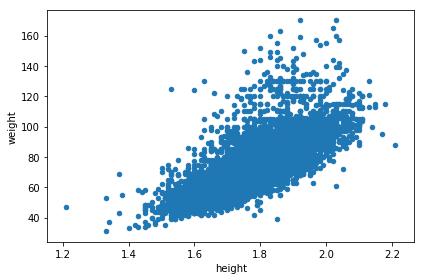

In [232]:
athletes.plot.scatter(x='height', y='weight')

/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


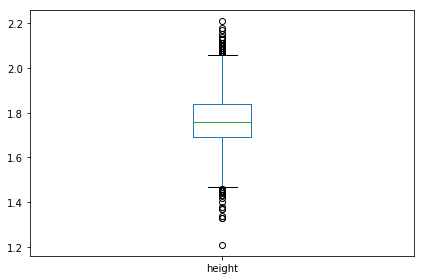

In [233]:
heights = athletes['height']
heights.plot.box()

In [236]:
q1 = heights.quantile(.25)
q3 = heights.quantile(.75)
iqr = q3 - q1
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr

nwh = heights.where(heights.between(pmin,pmax)) # will return where condition is true with original values but NaN where condition is not met
nwh

0        1.72
1        1.68
2        1.98
3        1.83
4        1.81
5        1.80
6        2.05
7        1.93
8        1.80
9        1.65
10       1.70
11       1.75
12        NaN
13       1.61
14       1.78
15       1.76
16       1.61
17       1.75
18       1.75
19        NaN
20       1.73
21       1.85
22       1.77
23       1.76
24       1.90
25       1.75
26       1.81
27       1.85
28       1.86
29       1.86
         ... 
11508    1.68
11509    1.76
11510    1.83
11511    1.72
11512    1.78
11513    1.78
11514    1.65
11515    1.65
11516    1.68
11517    1.84
11518    2.04
11519    1.68
11520    1.75
11521    1.75
11522    1.65
11523    1.75
11524    1.64
11525    1.64
11526    1.70
11527    1.80
11528    1.58
11529    1.95
11530    1.85
11531    1.83
11532    1.71
11533    1.64
11534    1.73
11535    1.85
11536    1.60
11537    1.85
Name: height, Length: 11538, dtype: float64

/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


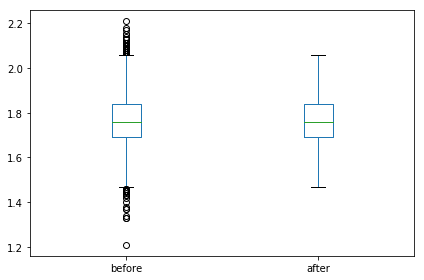

In [237]:
compare = pd.DataFrame({'before': heights, 'after': nwh})
compare.plot.box()

In [238]:
compare.describe()

,before,after
count,11208.000000,11116.000000
mean,1.766282,1.765085
std,0.112719,0.108882
min,1.210000,1.470000
25%,1.690000,1.690000
50%,1.760000,1.760000
75%,1.840000,1.840000
max,2.210000,2.060000


/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


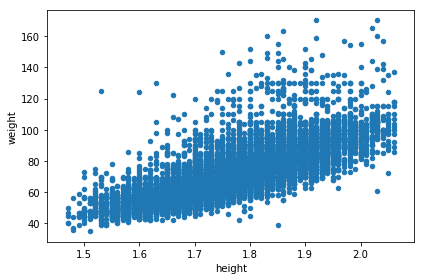

In [239]:
heights.where(heights.between(pmin,pmax), inplace=True)
athletes.plot.scatter(x='height', y='weight')

## Removing Duplicates

In [243]:
athletes = pd.read_csv(os.path.join(data_path, 'athletes_dup.csv'))
athletes.duplicated().any() # duplicated() returns a Series of Booleans by row

True

In [246]:
athletes[athletes.duplicated()] # shows all rows duplicated

,id,nationality,sex,height,weight,sport,gold,silver,bronze


In [245]:
athletes.drop_duplicates(inplace=True) # df.unique() returns a numpy array but not recommended

In [248]:
athletes['nationality'].drop_duplicates().sort_values()

51      AFG
1630    ALB
27      ALG
3161    AND
275     ANG
1859    ANT
127     ARG
579     ARM
543     ARU
1438    ASA
5       AUS
378     AUT
53      AZE
123     BAH
56      BAN
239     BAR
69      BDI
380     BEL
1869    BEN
1715    BER
5468    BHU
609     BIH
1584    BIZ
329     BLR
883     BOL
1298    BOT
79      BRA
11      BRN
4689    BRU
305     BUL
       ... 
3233    SUR
411     SVK
49      SWE
8678    SWZ
1288    SYR
554     TAN
627     TGA
582     THA
715     TJK
596     TKM
1248    TLS
137     TOG
198     TPE
832     TTO
141     TUN
191     TUR
3170    TUV
475     UAE
1429    UGA
328     UKR
299     URU
6       USA
16      UZB
1534    VAN
194     VEN
4198    VIE
1589    VIN
7699    YEM
1440    ZAM
831     ZIM
Name: nationality, Length: 207, dtype: object

In [249]:
athletes['nationality'].value_counts()

USA    567
BRA    485
GER    441
AUS    431
FRA    410
CHN    404
GBR    374
JPN    346
CAN    321
ESP    313
ITA    312
RUS    286
NED    249
POL    242
ARG    223
KOR    213
NZL    208
UKR    205
SWE    164
HUN    154
COL    154
RSA    146
DEN    128
MEX    126
BLR    124
CUB    123
IND    123
EGY    122
BEL    108
SUI    104
      ... 
OMA      4
COM      4
SLE      4
VIN      4
IVB      4
COD      4
ASA      4
MDV      4
GAM      4
YEM      3
TLS      3
BIZ      3
SOL      3
KIR      3
LIE      3
SSD      3
BRU      3
AFG      3
MON      3
STP      3
BHU      2
SWZ      2
CHA      2
MTN      2
LBR      2
SOM      2
NRU      2
GEQ      2
DMA      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [250]:
athletes['sex'].value_counts()

male      6333
female    5205
Name: sex, dtype: int64

## Type Conversion

In [251]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
id             11538 non-null int64
nationality    11538 non-null object
sex            11538 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null object
silver         11538 non-null object
bronze         11538 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 901.4+ KB


In [252]:
athletes[['gold','silver','bronze']].head()

,gold,silver,bronze
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [254]:
athletes['bronze'].astype(int)

ValueError: invalid literal for int() with base 10: 'O'

In [255]:
# convert O to 0
athletes[athletes['gold'] == 'O']

,id,nationality,sex,height,weight,sport,gold,silver,bronze
7521,666617738,RUS,male,1.71,72.0,canoe,O,O,O


In [256]:
athletes.loc[7521, ['gold','silver','bronze']] = 0

In [257]:
athletes[['gold', 'silver', 'bronze']] = athletes[['gold', 'silver', 'bronze']].astype(int) # dictionary can be passed in when df.astype is called
athletes[['gold', 'silver', 'bronze']].sum()

gold      666
silver    655
bronze    704
dtype: int64

## Fixing Indexes

In [258]:
# athletes.index = athletes['id'] # will containing both id index column and id column
athletes.set_index('id', drop=True, inplace=True) # default drop is True
athletes.head()

,nationality,sex,height,weight,sport,gold,silver,bronze
id,,,,,,,,
736041664,ESP,male,1.72,64.0,athletics,0,0,0
532037425,KOR,female,1.68,56.0,fencing,0,0,0
435962603,CAN,male,1.98,79.0,athletics,0,0,1
521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [259]:
athletes.rename(columns={"nationality": "country", "sport": "discipline"}, inplace=True) # rename index also possible
athletes.head()

,country,sex,height,weight,discipline,gold,silver,bronze
id,,,,,,,,
736041664,ESP,male,1.72,64.0,athletics,0,0,0
532037425,KOR,female,1.68,56.0,fencing,0,0,0
435962603,CAN,male,1.98,79.0,athletics,0,0,1
521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [260]:
weather_missing_df = pd.read_csv(os.path.join(data_path, 'weather_m4.csv'))
weather_missing_df.dropna(inplace=True)
weather_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 5 to 8783
Data columns (total 14 columns):
YYYYMMDD           831 non-null int64
TIME               831 non-null int64
TEMP               831 non-null int64
MIN_TEMP_GROUND    831 non-null float64
PRESSURE           831 non-null int64
HUMIDITY           831 non-null int64
VIEW_RANGE         831 non-null float64
CLOUD              831 non-null float64
MIST               831 non-null float64
RAIN               831 non-null float64
SNOW               831 non-null float64
THUNDER            831 non-null float64
ICE                831 non-null float64
WEATHER_CODE       831 non-null float64
dtypes: float64(9), int64(5)
memory usage: 97.4 KB


In [261]:
weather_missing_df.head()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
5,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
11,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
17,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
29,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
35,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0


In [262]:
# weather_missing_df.reset_index() # old index will be stored in a new "index" column
weather_missing_df.reset_index(drop=True)

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
1,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
3,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
4,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
5,20160102,24,73,64.0,10040,98,39.0,8.0,0.0,1.0,0.0,0.0,0.0,62.0
6,20160103,6,88,71.0,10025,96,47.0,8.0,0.0,1.0,0.0,0.0,0.0,23.0
7,20160103,12,78,71.0,10005,83,70.0,8.0,0.0,1.0,0.0,0.0,0.0,23.0
8,20160103,18,60,56.0,9929,89,69.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
9,20160103,24,53,50.0,9875,91,65.0,8.0,0.0,1.0,0.0,0.0,0.0,61.0


# Operations on Groups

## Iterate over group

In [73]:
small_df = df.iloc[49980:50019,:].copy()
grouped = small_df.groupby('artist')
type(grouped)

pandas.core.groupby.groupby.DataFrameGroupBy

## Aggregation

In [279]:
for name, group_df in grouped:
    min_year = group_df['acquisitionYear'].min()
    print("{}: {}".format(name, min_year))

Frost, Sir Terry: 1983.0
Phillips, Esq Tom: 1983.0
Wols: 1983.0


In [285]:
g = athletes.groupby('country')
g.sum()

,height,weight,gold,silver,bronze
country,,,,,
AFG,5.21,222.0,0,0,0
ALB,10.57,404.0,0,0,0
ALG,119.43,4219.0,0,2,0
AND,8.56,320.0,0,0,0
ANG,45.82,1907.0,0,0,0
ANT,14.37,588.0,0,0,0
ARG,396.93,16429.0,21,1,0
ARM,54.94,2125.0,1,3,0
ARU,12.20,481.0,0,0,0


In [287]:
g = athletes.groupby(['discipline', 'sex'])[['weight', 'height']]
g.mean()

weight    height
discipline        sex                         
aquatics          female   62.284483  1.715712
                  male     82.219061  1.860342
archery           female   64.301587  1.676190
                  male     80.079365  1.795714
athletics         female   60.152542  1.690500
                  male     74.777680  1.809234
badminton         female   61.209877  1.686000
                  male     76.156627  1.805059
basketball        female   75.377622  1.833819
                  male    100.297872  2.003611
boxing            female         NaN  1.682222
                  male           NaN  1.757615
canoe             female   66.457944  1.700648
                  male     82.150000  1.820455
cycling           female   60.207254  1.673128
                  male     72.576052  1.793074
equestrian        female   58.634146  1.682530
                  male     72.954887  1.790000
fencing           female   62.733871  1.712581
                  male     78.785124  1.833802
football          female   61.061069  1.682710
                  male     74.451713  1.793746
golf              female   63.200000  1.691404
                  male     79.000000  1.793500
gymnastics        female   49.555024  1.616524
                  male     63.254545  1.677105
handball          female   70.789157  1.759722
                  male     95.431694  1.913169
hockey            female   60.425926  1.667870
                  male     77.375000  1.800093
judo              female   65.392157  1.665132
                  male     84.616740  1.781783
modern pentathlon female   58.000000  1.699444
                  male     73.916667  1.825278
rowing            female   69.776190  1.773286
                  male     86.504615  1.898708
rugby sevens      female   66.595890  1.678552
                  male     90.450331  1.829145
sailing           female   63.194969  1.692767
                  male     77.122066  1.812770
shooting          female   62.675676  1.648400
                  male     81.068966  1.780343
table tennis      female   57.530120  1.653659
                  male     72.558140  1.786860
taekwondo         female   61.258065  1.730159
                  male     74.809524  1.863750
tennis            female   64.670455  1.734205
                  male     80.417476  1.860388
triathlon         female   54.563636  1.676545
                  male     66.814815  1.788704
volleyball        female   70.684211  1.828691
                  male     89.421875  1.964010
weightlifting     female   68.788462  1.603558
                  male     87.538961  1.709221
wrestling         female   61.805310  1.651239
                  male     85.372881  1.757215

In [85]:
## built-ins
grouped_acq_year = df.groupby('artist')['acquisitionYear']
min_acquisition_years = grouped_acq_year.agg(np.min)
min_acquisition_years = grouped_acq_year.min()
min_acquisition_years

artist
?British School                                                  1927.0
Abakanowicz, Magdalena                                           2009.0
Abbey, Edwin Austin                                              1924.0
Abbott, Berenice                                                 2010.0
Abbott, Lemuel Francis                                           1885.0
Abrahams, Ivor                                                   1975.0
Absalon                                                          1997.0
Abts, Tomma                                                      2006.0
Acconci, Vito                                                    1982.0
Ackling, Roger                                                   1983.0
Ackroyd, Norman                                                  1975.0
Adam, Robert                                                     1996.0
Adams, Harry William                                             1900.0
Adams, Norman                                            

## Transformation - return same size but with values changed based on original values

In [80]:
def fill_values(series):
    values_counted = series.value_counts()
    if values_counted.empty:
        return series
    most_frequent = values_counted.index[0]
    new_medium = series.fillna(most_frequent)
    return new_medium

def transform_df(source_df):
    group_dfs = []
    for name, group_df in source_df.groupby('artist'):
        filled_df = group_df.copy()
        filled_df.loc[:,'medium'] = fill_values(group_df['medium'])
        group_dfs.append(filled_df)
    new_df = pd.concat(group_dfs)
    return new_df


In [83]:
## built-ins
grouped_medium = df.groupby('artist')['medium']
df.loc[:,'medium'] = grouped_medium.transform(fill_values)
df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394.0,419.0,mm,165086.0
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311.0,213.0,mm,66243.0
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,343.0,467.0,mm,160181.0
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318.0,394.0,mm,125292.0
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,243.0,335.0,mm,81405.0
1040,"Blake, William",Ciampolo the Barrator Tormented by the Devils,Line engraving on paper,1826,1919.0,240.0,338.0,mm,81120.0
1041,"Blake, William",The Baffled Devils Fighting,Line engraving on paper,1826,1919.0,242.0,334.0,mm,80828.0
1042,"Blake, William",The Six-Footed Serpent Attacking Agnolo Brunel...,Line engraving on paper,1826,1919.0,246.0,340.0,mm,83640.0
1043,"Blake, William",The Serpent Attacking Buoso Donati,Line engraving on paper,1826,1919.0,241.0,335.0,mm,80735.0


## Filtering - Dropping Groups based on computation for each group

In [87]:
## built-ins
grouped_titles = df.groupby('title')
title_counts = grouped_titles.size().sort_values(ascending=False)
print(title_counts)
condition = lambda x: len(x.index) > 1
dup_titles_df = grouped_titles.filter(condition)
dup_titles_df.sort_values('title', inplace=True)


title
[title not known]                                                       3572
Blank                                                                   3031
[blank]                                                                 2482
[no title]                                                              1874
Untitled                                                                 639
Mountains                                                                538
[inscriptions by Turner]                                                 209
Shipping                                                                 202
Buildings                                                                156
River Scene                                                              109
Study of Sky                                                             101
Printed Page of Coltman’s ‘British Itinerary’                             92
Inscription by Turner: Draft of Poetry                                

/Users/leolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [88]:
dup_titles_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
20571,"Scully, Sean",#1,Aquatint on paper,1992,1992.0,117.0,174.0,mm,20358.0
21345,"Dunham, Carroll",#1,Drypoint on paper,1989,2002.0,392.0,579.0,mm,226968.0
21346,"Dunham, Carroll",#2,Drypoint on paper,1989,2002.0,392.0,579.0,mm,226968.0
20572,"Scully, Sean",#2,Aquatint on paper,1992,1992.0,323.0,278.0,mm,89794.0
21347,"Dunham, Carroll",#3,Drypoint on paper,1989,2002.0,392.0,579.0,mm,226968.0
20573,"Scully, Sean",#3,Aquatint on paper,1992,1992.0,319.0,260.0,mm,82940.0
21348,"Dunham, Carroll",#4,Drypoint on paper,1989,2002.0,392.0,579.0,mm,226968.0
3878,"Diebenkorn, Richard",#4,"Etching, aquatint and drypoint on paper",1978,1982.0,277.0,200.0,mm,55400.0
20574,"Scully, Sean",#4,Aquatint on paper,1992,1992.0,205.0,176.0,mm,36080.0


# Transformation

In [263]:
import numpy as np
import pandas as pd
trans_df = pd.DataFrame(np.ones([5,4]), columns=['a', 'b', 'c', 'd'])
trans_df

,a,b,c,d
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [264]:
trans_df * 2

,a,b,c,d
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0


In [265]:
trans_df.loc[1] /= 2
trans_df['b'] -= 1
trans_df

,a,b,c,d
0,1.0,0.0,1.0,1.0
1,0.5,-0.5,0.5,0.5
2,1.0,0.0,1.0,1.0
3,1.0,0.0,1.0,1.0
4,1.0,0.0,1.0,1.0


In [266]:
trans_df2 = pd.DataFrame(np.ones([3,2]), columns=['d', 'e'], index=[2,4,5])
trans_df2

,d,e
2,1.0,1.0
4,1.0,1.0
5,1.0,1.0


In [267]:
trans_df + trans_df2 # 

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2.0,NaN
5,NaN,NaN,NaN,NaN,NaN


In [268]:
trans_df.loc[2] * trans_df2.loc[5]

a    NaN
b    NaN
c    NaN
d    1.0
e    NaN
dtype: float64

In [269]:
trans_df - trans_df.mean()

,a,b,c,d
0,0.1,0.1,0.1,0.1
1,-0.4,-0.4,-0.4,-0.4
2,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1
4,0.1,0.1,0.1,0.1


In [270]:
trans_df - pd.Series({'a':5, 'b':5, 'e':5, 'f':5})

,a,b,c,d,e,f
0,-4.0,-5.0,NaN,NaN,NaN,NaN
1,-4.5,-5.5,NaN,NaN,NaN,NaN
2,-4.0,-5.0,NaN,NaN,NaN,NaN
3,-4.0,-5.0,NaN,NaN,NaN,NaN
4,-4.0,-5.0,NaN,NaN,NaN,NaN


In [273]:
trans_df.sub(trans_df.mean(axis=1), axis=0) # second axis=0 means row-wise

,a,b,c,d
0,0.25,-0.75,0.25,0.25
1,0.25,-0.75,0.25,0.25
2,0.25,-0.75,0.25,0.25
3,0.25,-0.75,0.25,0.25
4,0.25,-0.75,0.25,0.25


## Function Application

/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


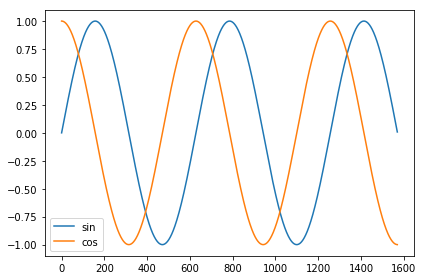

In [275]:
func_df = pd.DataFrame({'sin': np.arange(0,5*np.pi, 0.01), 'cos': np.arange(0.5*np.pi, 5.5*np.pi, 0.01)})
func_df = np.sin(func_df)
func_df.plot()

In [276]:
def iqr(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    return q3 - q1
func_df.apply(iqr) # can apply axis=1 for row-wise

sin    1.347237
cos    1.413649
dtype: float64

/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


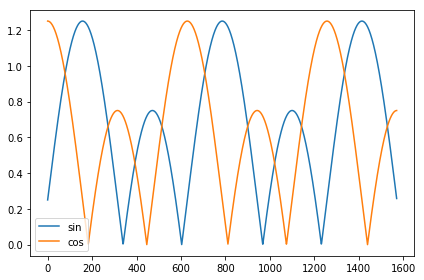

In [278]:
def everysinglevalue(x):
    return np.abs(x+.25)
func_df.applymap(everysinglevalue).plot()

## structural transformation

In [289]:
m = pd.read_csv(os.path.join(data_path,'monthly_data.csv'))
m

,YYYY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
0,2008,10140,10239,10050,10111,10159,10159,10141,10117,10178,10148,10125,10182,10146
1,2009,10137,10140,10140,10141,10188,10168,10128,10165,10208,10166,10041,10068,10141
2,2010,10151,10034,10168,10194,10158,10166,10158,10129,10147,10135,10057,10133,10136
3,2011,10182,10161,10227,10192,10182,10154,10123,10130,10149,10182,10194,10099,10165
4,2012,10194,10286,10271,10053,10159,10127,10139,10155,10149,10109,10108,10085,10153
5,2013,10142,10169,10099,10155,10113,10180,10201,10176,10151,10129,10155,10170,10153
6,2014,10055,10031,10164,10148,10154,10184,10143,10117,10189,10142,10103,10172,10134
7,2015,10135,10164,10198,10214,10152,10195,10142,10152,10171,10186,10150,10217,10173
8,2016,10100,10099,10144,10122,10140,10137,10168,10183,10177,10214,10144,10283,10159
9,2017,10228,10151,10154,10211,10170,10134,10141,10162,10135,10176,10141,10120,10160


In [290]:
m.set_index('YYYY', inplace=True)
m

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
YYYY,,,,,,,,,,,,,
2008,10140,10239,10050,10111,10159,10159,10141,10117,10178,10148,10125,10182,10146
2009,10137,10140,10140,10141,10188,10168,10128,10165,10208,10166,10041,10068,10141
2010,10151,10034,10168,10194,10158,10166,10158,10129,10147,10135,10057,10133,10136
2011,10182,10161,10227,10192,10182,10154,10123,10130,10149,10182,10194,10099,10165
2012,10194,10286,10271,10053,10159,10127,10139,10155,10149,10109,10108,10085,10153
2013,10142,10169,10099,10155,10113,10180,10201,10176,10151,10129,10155,10170,10153
2014,10055,10031,10164,10148,10154,10184,10143,10117,10189,10142,10103,10172,10134
2015,10135,10164,10198,10214,10152,10195,10142,10152,10171,10186,10150,10217,10173
2016,10100,10099,10144,10122,10140,10137,10168,10183,10177,10214,10144,10283,10159


In [306]:
m.stack().sum()

1319751

In [294]:
w = athletes.groupby(['discipline', 'sex'])['weight'].mean()
w.unstack()

sex,female,male
discipline,,
aquatics,62.284483,82.219061
archery,64.301587,80.079365
athletics,60.152542,74.777680
badminton,61.209877,76.156627
basketball,75.377622,100.297872
boxing,NaN,NaN
canoe,66.457944,82.150000
cycling,60.207254,72.576052
equestrian,58.634146,72.954887


## Reshaping rows and columns with pivot()

In [299]:
p = pd.DataFrame({'id': [823905, 823905, 235897, 235897, 235897, 983422, 983422],
                  'item': ['price', 'unit', 'price', 'unit', 'stock', 'price', 'stock'],
                  'value': [3.49, 'kg', 12.89, 'l', 50, 0.49, 4]})
p

,id,item,value
0,823905,price,3.49
1,823905,unit,kg
2,235897,price,12.89
3,235897,unit,l
4,235897,stock,50
5,983422,price,0.49
6,983422,stock,4


In [300]:
p.pivot('id', 'item', 'value') # transforming one column into many-> df.pivot("index", "columns", "values")

item,price,stock,unit
id,,,
235897,12.89,50,l
823905,3.49,NaN,kg
983422,0.49,4,NaN


In [302]:
grades

,test_1,test_2,passed
Mary,6,4,False
John,7,8,True
Ann,6,7,True
Pete,6,5,False
Laura,5,2,False


In [303]:
grades.reset_index(inplace=True) # will create new column with previous index, and with newly indexed index reset
# df.reset_index().rename(columns={'index': 'prod_id'})

In [304]:
grades.melt(id_vars=['index']) # transforming many columns into one

,index,variable,value
0,Mary,test_1,6
1,John,test_1,7
2,Ann,test_1,6
3,Pete,test_1,6
4,Laura,test_1,5
5,Mary,test_2,4
6,John,test_2,8
7,Ann,test_2,7
8,Pete,test_2,5
9,Laura,test_2,2


## Combining Datasets

In [312]:
grades = pd.DataFrame([[6,4,5], [7,8,7], [6,7,9], [6,5,5], [5,2,7]], index=['Mary', 'John', 'Ann', 'Pete', 'Laura'], columns = ['test_1', 'test_2', 'test_3'])
grades

,test_1,test_2,test_3
Mary,6,4,5
John,7,8,7
Ann,6,7,9
Pete,6,5,5
Laura,5,2,7


In [313]:
grades['test_4'] = pd.Series({'John': 5, 'Ann': 8, 'Pete': 9, 'Mary': 7, 'Laura': 10})
grades

,test_1,test_2,test_3,test_4
Mary,6,4,5,7
John,7,8,7,5
Ann,6,7,9,8
Pete,6,5,5,9
Laura,5,2,7,10


In [315]:
grades.loc['Bob'] = [2,3,4,5]
grades

,test_1,test_2,test_3,test_4
Mary,6,4,5,7
John,7,8,7,5
Ann,6,7,9,8
Pete,6,5,5,9
Laura,5,2,7,10
Bob,2,3,4,5


In [317]:
new_row = pd.Series({'test_1': 5, 'test_2': 6, 'test_3': 7, 'test_4': 8}, name="Kim")
grades.append(new_row) # no inplace=True no real replacement

,test_1,test_2,test_3,test_4
Mary,6,4,5,7
John,7,8,7,5
Ann,6,7,9,8
Pete,6,5,5,9
Laura,5,2,7,10
Bob,2,3,4,5


In [319]:
grades['stud_nr'] = [113,121,123,135,139,141]
grades = grades[['stud_nr', 'test_1', 'test_2', 'test_3', 'test_4']]
grades

,stud_nr,test_1,test_2,test_3,test_4
Mary,113,6,4,5,7
John,121,7,8,7,5
Ann,123,6,7,9,8
Pete,135,6,5,5,9
Laura,139,5,2,7,10
Bob,141,2,3,4,5


In [320]:
other = pd.DataFrame([[139,7,7],[123,8,6],[142,4,5],[113,7,9],[155,10,9],[121,6,4]], columns = ['stud_nr', 'exam1', 'exam2'])
other

,stud_nr,exam1,exam2
0,139,7,7
1,123,8,6
2,142,4,5
3,113,7,9
4,155,10,9
5,121,6,4


In [322]:
grades.merge(other, how='outer') # inner/left/right/outer but where is the row index? merge still needs inplace=True

,stud_nr,test_1,test_2,test_3,test_4,exam1,exam2
0,113,6.0,4.0,5.0,7.0,7.0,9.0
1,121,7.0,8.0,7.0,5.0,6.0,4.0
2,123,6.0,7.0,9.0,8.0,8.0,6.0
3,135,6.0,5.0,5.0,9.0,NaN,NaN
4,139,5.0,2.0,7.0,10.0,7.0,7.0
5,141,2.0,3.0,4.0,5.0,NaN,NaN
6,142,NaN,NaN,NaN,NaN,4.0,5.0
7,155,NaN,NaN,NaN,NaN,10.0,9.0


# Output Data Frames

## Excel

In [94]:
df = pd.read_pickle(os.path.join(data_path,'artwork_data_frame.pickle'))
small_df = df.iloc[49980:50019,:].copy()
# Basic Excel
small_df.to_excel('../reports/excels/basic.xlsx')
small_df.to_excel('../reports/excels/no_index.xlsx', index=False)
small_df.to_excel('../reports/excels/columns.xlsx', columns=['artist', 'title', 'year'])
# Multiple worksheets
writer = pd.ExcelWriter('../reports/excels/multiple_sheets.xlsx', engine='xlsxwriter')
small_df.to_excel(writer, sheet_name='Preview', index=False)
df.to_excel(writer, sheet_name='Complete', index=False)
writer.save()

In [99]:
# Conditional formatting
artist_counts = df['artist'].value_counts()
artist_counts.head()
writer = pd.ExcelWriter('../reports/excels/colors.xlsx', engine='xlsxwriter')
artist_counts.to_excel(writer, sheet_name='Artist Counts')
sheet = writer.sheets['Artist Counts']
cells_range = 'B2:B{}'.format(len(artist_counts.index))
sheet.conditional_format(cells_range, {'type':'2_color_scale',
                                       'min_value': '10',
                                       'min_type': 'percentile',
                                       'max_value': '99',
                                       'max_type': 'percentile'})
writer.save()

## Sql

In [100]:
import sqlite3
with sqlite3.connect("sqlite_database.db") as conn:
    small_df.to_sql('Tate', conn) # first parameter is the name of the table

# import sqlalchemy as sa
# with sa.create_engine('postgresql://localhost/my_data') as conn:
#     small_df.to_sql('Tate', conn)


## Json

In [101]:
small_df.to_json('../reports/jsons/default.json')
small_df.to_json('../reports/jsons/table.json', orient='table')

# Plotting

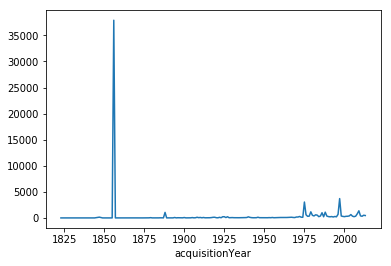

In [109]:
acquisition_years = df.groupby('acquisitionYear').size()
acquisition_years.plot()

/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['source sans pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['consolas'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


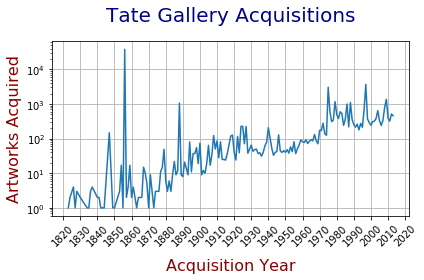

In [126]:
# interact with matplotlib - figure=>Subplots==Axes
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True, 'axes.titlepad': 20})

title_font= {'family': 'source sans pro', 'color': 'darkblue', 'weight': 'normal', 'size': 20,}
labels_font = {'family': 'consolas', 'color': 'darkred', 'weight': 'normal', 'size': 16,}

fig = plt.figure()
subplot = fig.add_subplot(111)
acquisition_years.plot(ax=subplot, rot=45, logy=True, grid=True)
subplot.set_xlabel('Acquisition Year', fontdict=labels_font, labelpad=10)
subplot.set_ylabel('Artworks Acquired', fontdict=labels_font)
subplot.locator_params(nbins=40,axis='x')
subplot.set_title('Tate Gallery Acquisitions', fontdict=title_font)
fig.show()


In [127]:
# save to files
fig.savefig('../reports/figures/panda_plot.png')
fig.savefig('../reports/figures/panda_plot.svg', format='svg')

/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['source sans pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/leolin/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['consolas'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
